Dataset Overview:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
Cust

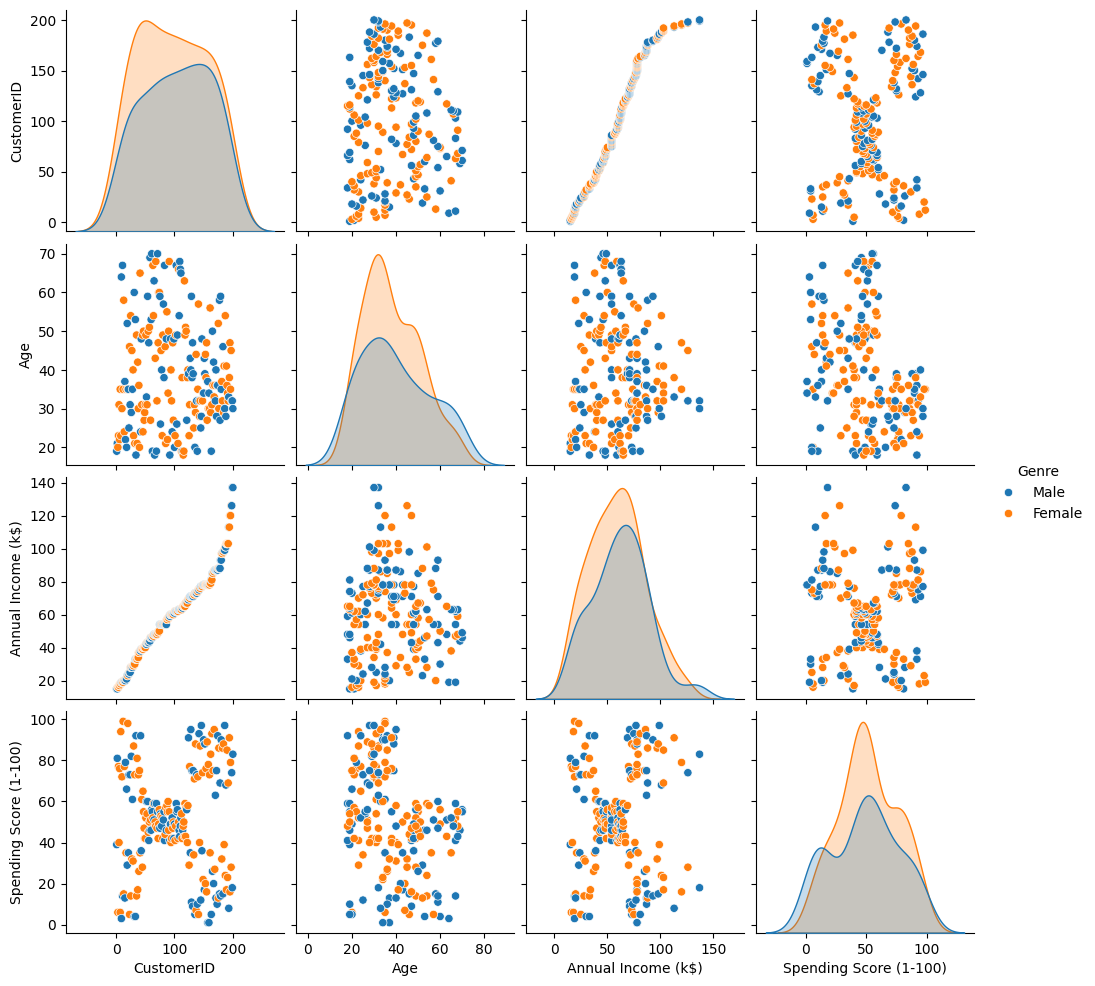

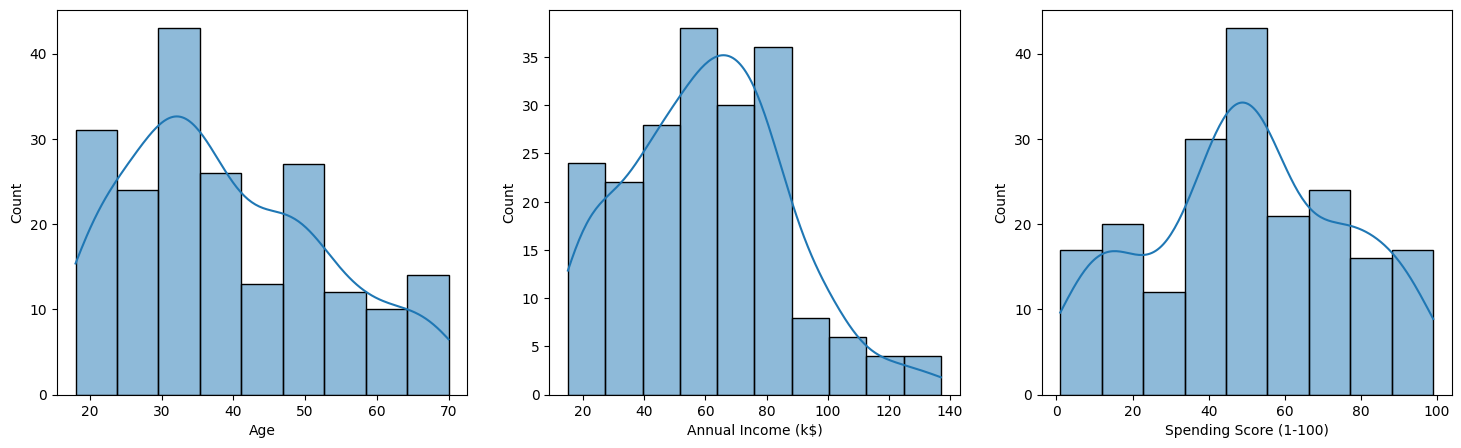

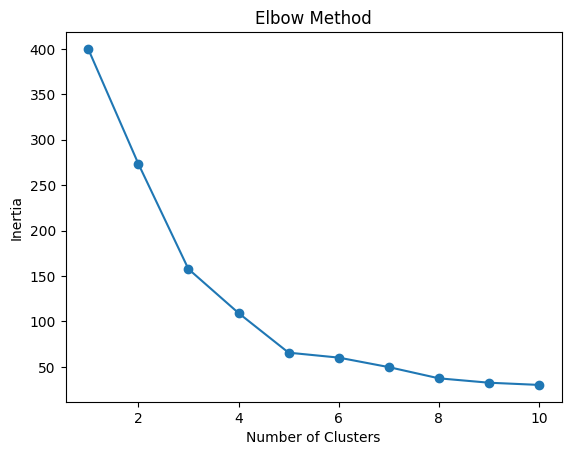

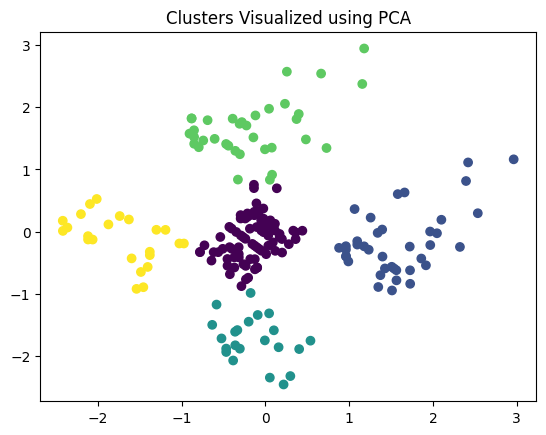

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.90      1.00      0.95         9
           2       1.00      0.83      0.91         6
           3       0.87      1.00      0.93        13
           4       1.00      1.00      1.00         5

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60

Silhouette Score: 0.34219170811155797


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score

path = '/content/Mall_Customers.csv'
data = pd.read_csv(path)

print('Dataset Overview:')
print(data.head())
print('\nData Info:')
print(data.info())

print('\nMissing Values:')
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)
sns.pairplot(data, hue='Genre')
print('\n\nPairplot of Features\n')
# IMP NOTE:
# Diagonal elements are histograms (or KDE plots), showing the distribution of individual features.
# Non-diagonal elements are scatter plots, showing the relationship between pairs of features.
# Different colors (hues) indicate different genres (Male/Female).
plt.show()


# Distribution of Age, Annual Income, and Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Age'], kde=True, ax=axes[0]) # kde is basically Kernel Density Estimate (curve on top of histogram for smooth distribution line)
sns.histplot(data['Annual Income (k$)'], kde=True, ax=axes[1])
sns.histplot(data['Spending Score (1-100)'], kde=True, ax=axes[2])
plt.show()

# Data Preprocessing
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

# Normalizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# UNSUPERVISED APPROACH: K-Means Clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

pca = PCA(n_components=2)
components = pca.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.scatter(components[:, 0], components[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Visualized using PCA')
plt.show()

# SUPERVISED APPROACH: Decision Tree Classification
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Cluster']  # note that here y is assign to the cluster labels that were generated earlier using K-Means clustering ( as it is supervised learning technique )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluation
# IMP NOTE:
# y_test represents the true labels or desired labels from the test dataset.
# y_pred represents the predicted labels obtained from the Decision Tree Classifier.
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Silhouette Score:', silhouette_score(X, data['Cluster']))
